In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

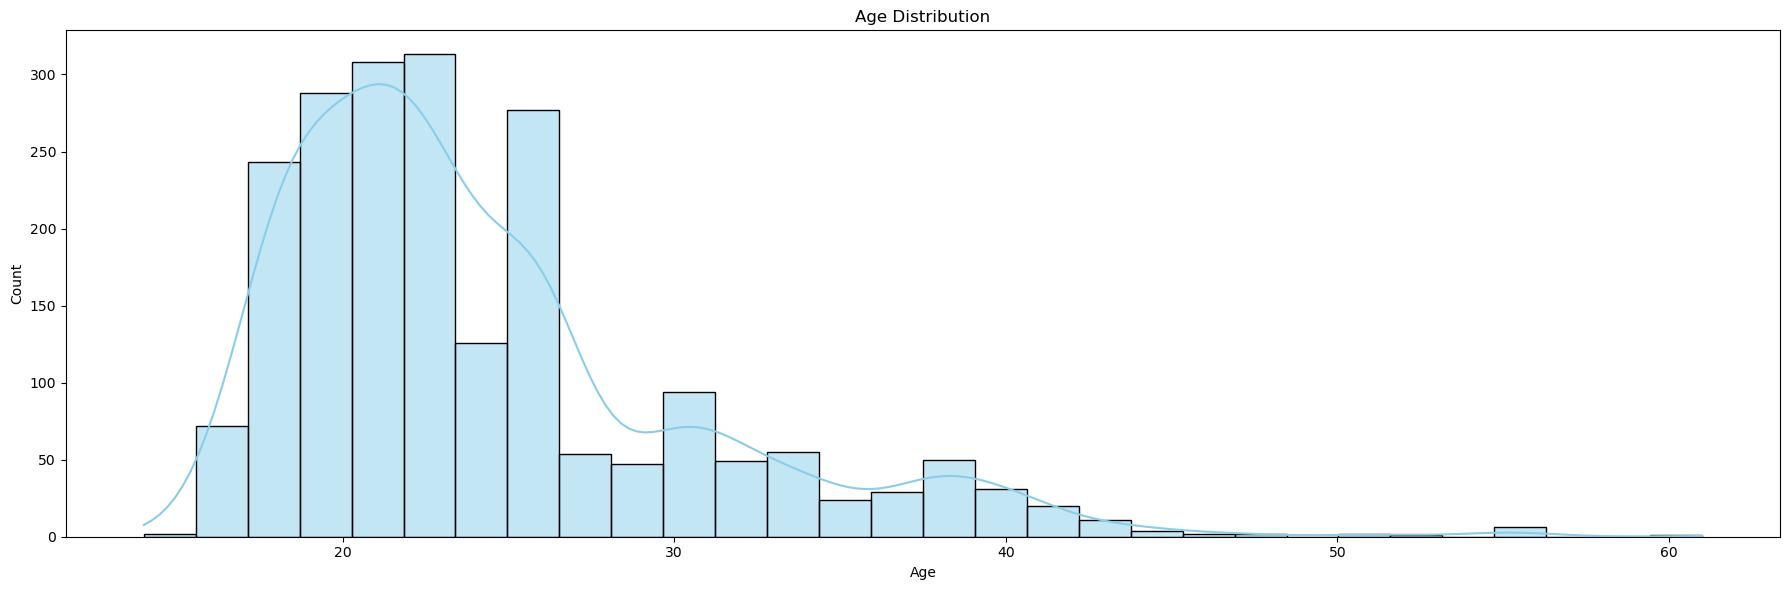

In [4]:
#Distribution plots for respective columns of age, height and weight.
plt.figure(figsize=(18,6))

sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.tight_layout()#used to automatically adjust subplot parameters to give specified padding.
plt.show()

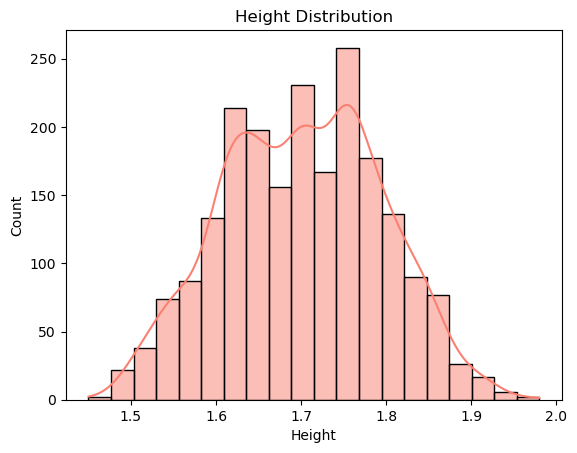

<Figure size 640x480 with 0 Axes>

In [5]:
sns.histplot(df['Height'], kde=True, bins=20, color='salmon')
plt.title('Height Distribution')
plt.show()
plt.tight_layout()

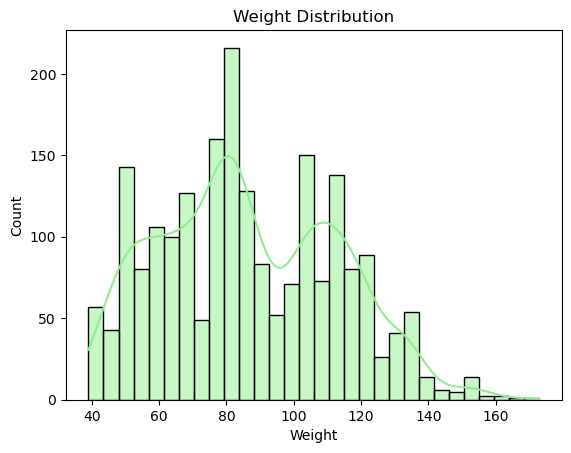

<Figure size 640x480 with 0 Axes>

In [6]:
sns.histplot(df['Weight'], kde=True, bins=30, color='lightgreen')
plt.title('Weight Distribution')
plt.show()

plt.tight_layout()

In [8]:
#Applying supervised machine learning algorithm-Support Vector Machine on the given daatset.
#It is to be noted that the 2 distinguashable classes for which this model works is all the given
#Categorical features in the dataset VS the last final column i.e NObeyesdad.

#Importing all the necessary libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [10]:
#Load the dataset.
data=pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

In [11]:
# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    lab_enc_cat_col = LabelEncoder()
    data[column] = lab_enc_cat_col.fit_transform(data[column])
    label_encoders[column] = lab_enc_cat_col

# Prepare features (x) and target (y)
# Features and target variable
X = data.drop('NObeyesdad', axis=1)  
y = data['NObeyesdad']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the features
#Reason:Many machine learning algorithms use distance-based calculations to make predictions. 
#If the features are not scaled, those with larger values can have a disproportionate impact on the results.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [15]:
#Model has been succesfully fitted!

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([0, 4, 1, 0, 6, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 1, 4, 3, 3, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 5, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 5, 3, 1, 1, 1, 5, 0, 5, 3, 3, 1, 3, 1, 4, 6, 0, 3, 6,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 2, 4, 3, 1, 2, 3, 3, 2, 2, 5, 6,
       1, 6, 1, 3, 0, 1, 2, 0, 1, 2, 5, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 5, 4, 3, 2, 5, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 5, 4, 0, 4, 1, 2, 6, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 1, 2, 0, 3, 0, 3, 1, 5, 6, 1, 1, 3, 4, 2, 6,
       2, 6, 2, 1, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 1, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 6, 3, 5, 3, 6, 0, 4, 1, 1, 5, 4, 1, 5, 5, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 5, 2, 1, 2, 2, 0, 5, 2, 0, 6, 1, 5, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 6, 3, 3, 6, 6, 1,

In [16]:
# Proceeding with the final evaluation the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [17]:
#Printing the final results:rint("SVM Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

Accuracy: 88.89%
Confusion Matrix:
[[52  4  0  0  0  0  0]
 [ 3 52  1  0  0  4  2]
 [ 0  0 70  4  0  2  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1 12  0  0  0 41  2]
 [ 0  2  2  0  0  5 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.74      0.84      0.79        62
           2       0.95      0.90      0.92        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.79      0.73      0.76        56
           6       0.87      0.82      0.85        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423

